<a target="_blank" href="https://colab.research.google.com/github/jay-gleeson/fintech-pairs-csuf/blob/main/archive/pairs_trading.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Import necessary dependencies for download stock data, cleaning data, and plotting.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Create pandas DataFrame with various financial institutions using yfinance.

In [2]:
# Downloading data for American Express, Bank of America, Citibank, Capital One, Goldman Sachs,
# Chase, Mastercard, US Bank, Visa, and Wells Fargo from June 1, 2024 to June 1, 2025.
#
# Note: Only the daily adjusted close price column per each stock will be considered.
stocks = ['AXP','BAC','C','COF','GS','JPM','MA','USB','V','WFC']
df = yf.download(stocks, start='2024-06-01', end='2025-06-01', auto_adjust=False, progress=False)['Adj Close']

# Clean dataframe by dropping any columns that are completely empty and forward-filling missing data.
df = df.dropna(axis=1, how='all')
df = df.ffill()

# Preview dataframe.
print(df.head())

Ticker             AXP        BAC          C         COF          GS  \
Date                                                                   
2024-06-03  234.230865  38.690689  59.893799  135.232727  445.632477   
2024-06-04  234.596725  38.496655  59.032917  132.629059  445.945862   
2024-06-05  232.065353  38.768299  59.748703  133.615311  452.194794   
2024-06-06  230.740341  38.516056  59.913139  134.493057  448.688416   
2024-06-07  230.067963  38.828403  59.758381  137.875839  445.563904   

Ticker             JPM          MA        USB           V        WFC  
Date                                                                  
2024-06-03  197.245499  440.597687  37.951439  268.428650  57.947166  
2024-06-04  194.645798  442.168396  37.215908  270.453918  57.322186  
2024-06-05  192.788849  444.047363  37.330540  272.518890  57.302658  
2024-06-06  192.446793  446.055542  37.273224  275.040588  56.374954  
2024-06-07  195.417877  447.159088  37.273224  276.658783  56.990166 

# Using greedy methods, find min, max, mean, variance, standard deviation, and interquartile range of stocks and download to csv for future use.

In [3]:
# Find length of each column.
#
# Function to find length of each column.
def length(data):
    count = 0
    for n in data:
        count += 1
    return count

# Sort each column in ascending order.
#
# Function to, upon call, sort a list of data in ascending order, using selection sort for simplicity.
def sort(data):
    data = data.copy()
    L = length(data)
    for i in range(L):
        index = i
        for j in range(i + 1, L):
            if data[j] < data[index]:
                index = j
        data[i], data[index] = data[index], data[i]
    return data


# Find minimum and maximum of each stock.
#
# Function to find minimum daily adjusted close price.
def minimum(data):
    min = data[0]
    for n in data:
        if n < min:
            min = n
    return min

# Function to find maximum daily adjusted close price.
def maximum(data):
    max = data[0]
    for n in data:
        if n > max:
            max = n
    return max

# Find range of each stock.
#
# Function to find the range of each stock.
def spread_range(data):
    return maximum(data) - minimum(data)

# Find mean price of each stock.
#
# Function to find mean daily adjusted close price of each stock.
def mean(data):
    sum = 0
    for n in data:
        sum += n
    return sum / length(data)

# Find variance of each stock.
#
# Function to find variance of each stock.
def variance(data):
    m = mean(data)
    sum_dev = 0

    # Numerator of variance formula, find sum of squared deviations.
    for n in data:
        sum_dev += (n - m) ** 2
    return sum_dev / (length(data) - 1)  # Note: Sample variance.

# Find standard deviation of each stock.
#
# Function to find standard deviation of each stock.
def stddev(data):

    # Standard deviation is the square root of the variance.
    return variance(data) ** 0.5

# Find interquartile range of each stock.
#
# Function to find interquartile range of each stock.
def iqr(data):
    data = sort(data)
    L = length(data)

    # Interpolation function to find quartiles, using linear interpolation between adjacent sorted values.
    def interpolate(quartile):
        pos = quartile * (L - 1)
        low = int(pos)

        def minimum(a, b):
            if a < b:
                return a
            else:
                return b

        high = minimum(low + 1, L - 1)
        return data[low] + (data[high] - data[low]) * (pos - low)

    return interpolate(0.75) - interpolate(0.25)  # Return interquartile range, the 75th percentile minus the 25th percentile.

In [4]:
# Combine statistics and print to console.
#
# Create dataframe with columns as the tickers and the rows as the statistics.
stats = pd.DataFrame(columns=stocks, index=['Min','Max','Range','Mean','Variance','Std Dev', 'IQR'])

# Iterate through stocks and compute each statistic.
for ticker in stocks:
    data = df[ticker].tolist()

    stats[ticker] = [minimum(data), maximum(data), spread_range(data), mean(data), variance(data), stddev(data), iqr(data)]

# Print statistics.
print(stats)

                 AXP        BAC          C         COF           GS  \
Min       219.705139  34.188526  54.796139  129.611176   435.142517   
Max       324.791748  47.162689  83.958618  209.152359   665.555786   
Range     105.086609  12.974163  29.162479   79.541183   230.413269   
Mean      271.134523  41.561109  66.764779  166.245340   535.360602   
Variance  731.814004   9.657268  51.978120  533.708821  3614.875141   
Std Dev    27.052061   3.107614   7.209585   23.102139    60.123832   
IQR        45.743637   5.572601  10.505775   41.069885   101.038177   

                 JPM           MA        USB            V        WFC  
Min       187.188721   427.719788  36.400002   251.908737  50.744259  
Max       278.236206   586.409973  52.475639   367.899994  80.577927  
Range      91.047485   158.690186  16.075638   115.991257  29.833668  
Mean      229.741910   508.671906  44.047664   306.040482  65.678648  
Variance  563.343289  1779.122210  15.500029  1129.054023  74.942861  
Std D

# Compute pearson correlation, spearman correlation, and kendall correlation.
# Then, find which two stocks are most correlated with each other using each method.

In [5]:
# Function to compute and export correlation matrix and heatmap.
def get_matrix(df, stocks, corr, filename_prefix, title):
    matrix = pd.DataFrame(index=stocks, columns=stocks, dtype=float)
    for i in stocks:
        for j in stocks:
            if stocks.index(j) >= stocks.index(i):
                matrix.loc[i, j] = corr(df[i].tolist(), df[j].tolist())
            else:
                matrix.loc[i, j] = np.nan
    plt.figure(figsize=(10, 8))
    sb.heatmap(matrix, annot=True, cmap='Spectral')
    plt.title(f'{title} Correlation Heatmap')
    plt.show()
    plt.close()

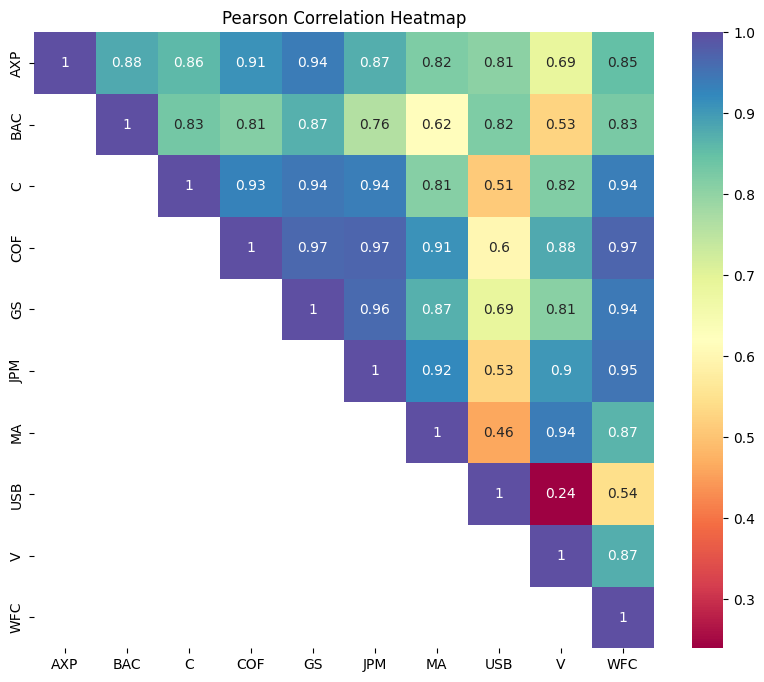

In [6]:
# Find pearson correlation coefficient between each stock.
#
# Function to find pearson correlation coefficient between each stock.
def pearson_corr(x, y):
    meanx = mean(x)
    meany = mean(y)
    covariancexy = 0
    variancex = 0
    variancey = 0

    # Formula for pearson correlation coefficient is covariance divided by the product of the standard deviations.
    for n in range(length(x)):
        covariancexy += (x[n] - meanx) * (y[n] - meany)
        variancex += (x[n] - meanx) ** 2
        variancey += (y[n] - meany) ** 2
    return covariancexy / ((variancex * variancey) ** 0.5)

# Compute and display pearson correlation.
get_matrix(df, stocks, pearson_corr, "pearson", "Pearson")

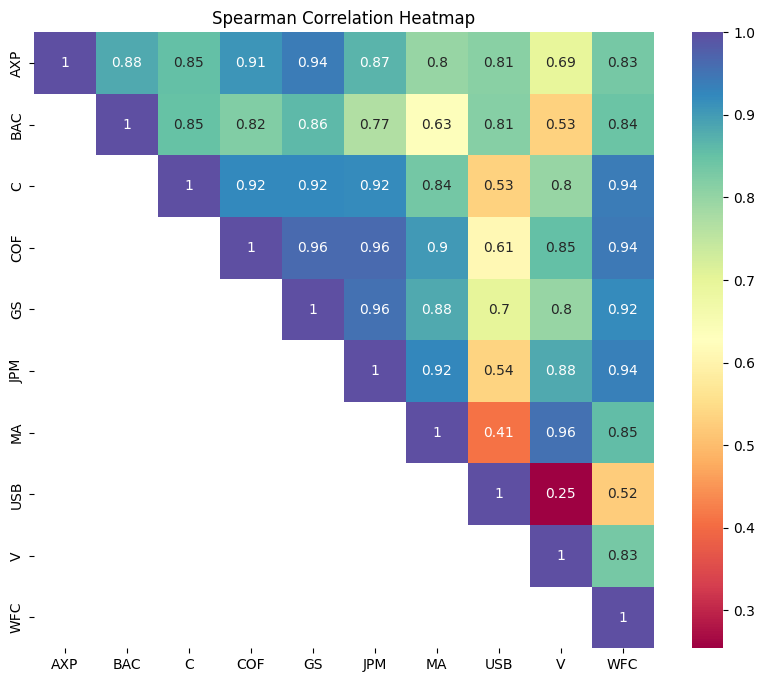

In [7]:
# Find spearman correlation coefficient between each stock.
#
# Function to find spearman correlation coefficient between each stock.
def spearman_corr(x, y):

    # Function to rank data, using average ranks for ties.
    def rank(data):
        L = length(data)
        data = [[data[i], i] for i in range(L)]
        data = sort(data)

        rank = [0] * L
        i = 0
        while i < L:
            val = data[i][0]
            j = i
            while j + 1 < L and data[j + 1][0] == val:
                j += 1
            avg_rank = (i + j + 2) / 2
            for k in range(i, j + 1):
                rank[data[k][1]] = avg_rank
            i = j + 1
        return rank

    # Rank the data and compute pearson correlation on the ranks.
    rankx = rank(x)
    ranky = rank(y)
    return pearson_corr(rankx, ranky)

# Compute and display spearman correlation.
get_matrix(df, stocks, spearman_corr, "spearman", "Spearman")

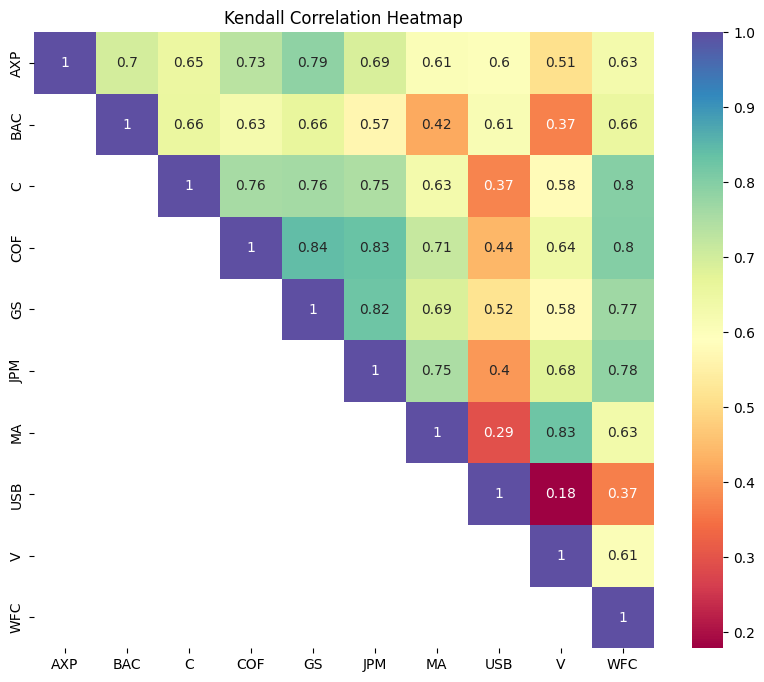

In [8]:
# Find kendall correlation coefficient between each stock.
#
# Function to find kendall correlation coefficient between each stock.
def kendall_corr(x, y):
    L = length(x)
    concordant = 0
    discordant = 0

    # Formula for kendall correlation coefficient is the difference between the number of concordant and discordant pairs divided by the total number of pairs.
    for i in range(L):
        for j in range(i + 1, L):
            if (x[i] - x[j]) * (y[i] - y[j]) > 0:
                concordant += 1
            elif (x[i] - x[j]) * (y[i] - y[j]) < 0:
                discordant += 1
    return (concordant - discordant) / ((L * (L - 1)) / 2)

# Compute and display kendall correlation.
get_matrix(df, stocks, kendall_corr, "kendall", "Kendall")

In [9]:
# Given all correlation methods, find the most correlated pairs of stocks.
#
# Function to find the most correlated pairs of credit network stocks, Visa, Mastercard, American Express, and Capital One.
stocks = ['V', 'MA', 'AXP', 'COF']  # Note: Discover (DFS) was acquired by Capital One (COF).
def greatest_corr(df, stocks, corr, method):
    L = length(stocks)
    max_corr = 0
    pair = None
    for i in range(L):
        for j in range(i + 1, L):
            corr_value = corr(df[stocks[i]].tolist(), df[stocks[j]].tolist())
            if corr_value > max_corr:
                max_corr = corr_value
                pair = (stocks[i], stocks[j])
    print(f"Most correlated pair ({method}): {pair} with correlation {max_corr}")
    return pair

# Return the most correlated pairs of stocks for each correlation method.
print("Best Correlated Pairs by Method:")
pearson_pair = greatest_corr(df, stocks, pearson_corr, "Pearson")
spearman_pair = greatest_corr(df, stocks, spearman_corr, "Spearman")
kendall_pair = greatest_corr(df, stocks, kendall_corr, "Kendall")

Best Correlated Pairs by Method:
Most correlated pair (Pearson): ('V', 'MA') with correlation 0.9405099686205364
Most correlated pair (Spearman): ('V', 'MA') with correlation 0.9562401695454159
Most correlated pair (Kendall): ('V', 'MA') with correlation 0.8252364295893251


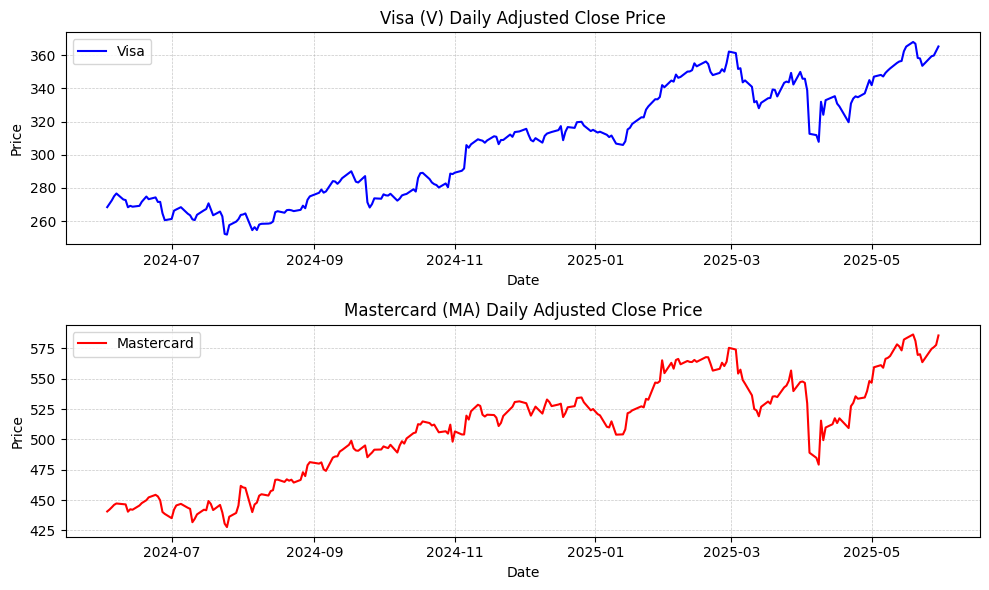

In [10]:
# Given the two most correlated pairs of stocks, plot two subplots of the daily adjusted close price of each stock in the pair.
def plot_pair(df, pair):
    stocka, stockb = pair

    # Map tickers to company names.
    stock_names = {
        'AXP': 'American Express',
        'COF': 'Capital One',
        'MA': 'Mastercard',
        'V': 'Visa',
    }

    namea = stock_names[stocka] if stocka in stock_names else stocka
    nameb = stock_names[stockb] if stockb in stock_names else stockb

    # Plot the daily adjusted close price of each stock in the pair.
    #
    # Stock A plots on the top.
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(df[stocka], label=namea, color='blue')
    plt.title(f'{namea} ({stocka}) Daily Adjusted Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Stock B plots on the bottom.
    plt.subplot(2, 1, 2)
    plt.plot(df[stockb], label=nameb, color='red')
    plt.title(f'{nameb} ({stockb}) Daily Adjusted Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Export the plot to a file.
    plt.tight_layout()
    plt.show()
    plt.close()

# Plot the most correlated pair based on Spearman correlation.
plot_pair(df, spearman_pair)

In [11]:
# Compute engle-granger cointegration.  *** TO BE COMPLETED

In [12]:
# Utilize pairs trading methods to find optimal pairs trading strategy.  *** TO BE COMPLETED